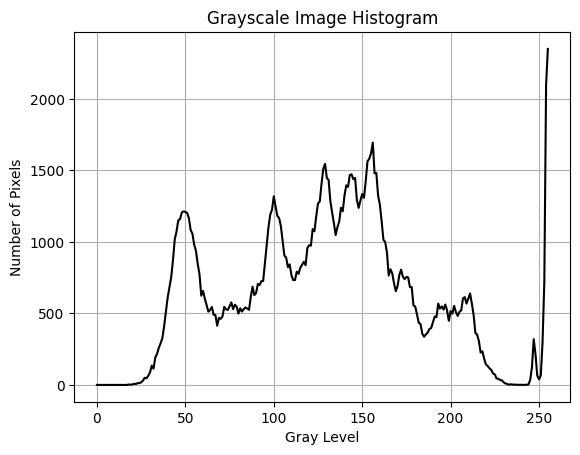

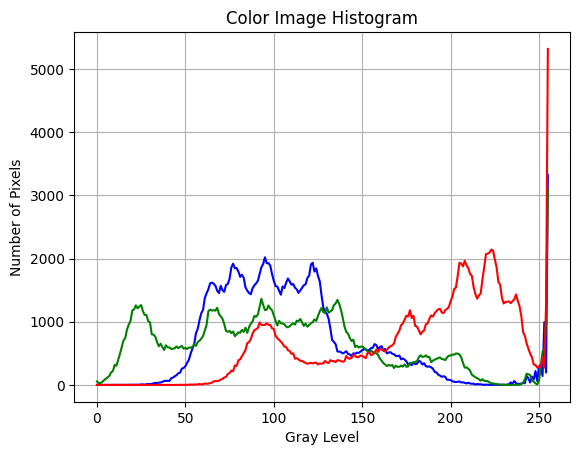

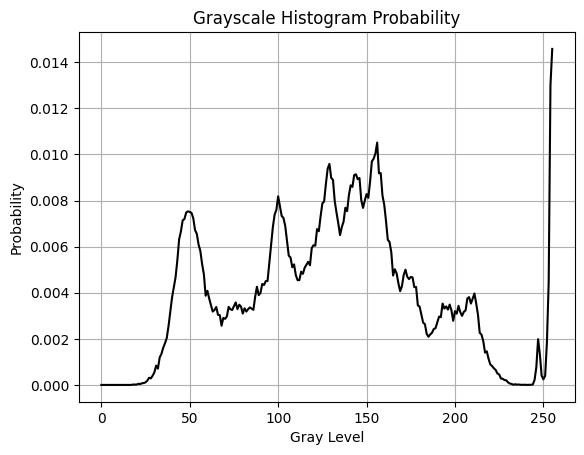

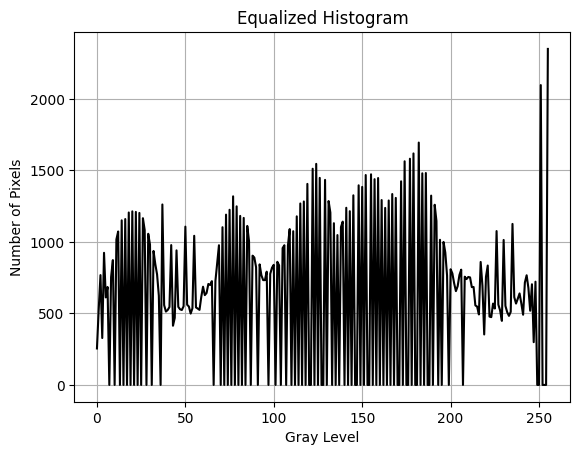

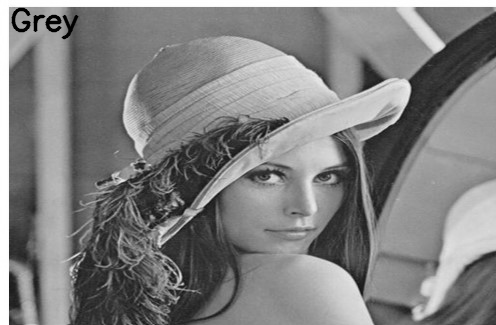

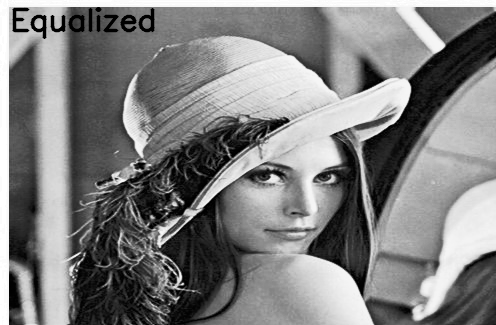

In [ ]:
#Anshika Gupta: E22CSEU0921: Batch-31
from IPython import get_ipython
from IPython.display import display
# %%
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def compute_histogram(image, channels=[0], mask=None, hist_size=[256], ranges=[0, 256]):
    hist = cv2.calcHist([image], channels, mask, hist_size, ranges)
    return hist

def plot_histogram(hist, title, xlabel='Gray Level', ylabel='Number of Pixels'):
    plt.figure()
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def plot_color_histogram(image):
    colors = ('b', 'g', 'r')
    plt.figure()
    for i, color in enumerate(colors):
        hist = compute_histogram(image, channels=[i])
        plt.plot(hist, color=color)
    plt.title('Color Image Histogram')
    plt.xlabel('Gray Level')
    plt.ylabel('Number of Pixels')
    plt.grid()
    plt.show()

def normalize_histogram(hist):
    hist_prob = hist / hist.sum()
    return hist_prob

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def main():
    # Load grayscale and color images
    color_image = cv2.imread('color_image.jpg')  # Load your image
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Compute and plot grayscale histogram
    grayscale_hist = compute_histogram(grayscale_image)
    plot_histogram(grayscale_hist, 'Grayscale Image Histogram')

    # Compute and plot color histogram
    plot_color_histogram(color_image)

    # Convert histogram to probability distribution and plot
    grayscale_hist_prob = normalize_histogram(grayscale_hist)
    plot_histogram(grayscale_hist_prob, 'Grayscale Histogram Probability', ylabel='Probability')

    # Enhance contrast using histogram equalization
    equalized_image = histogram_equalization(grayscale_image)
    equalized_hist = compute_histogram(equalized_image)
    plot_histogram(equalized_hist, 'Equalized Histogram')

    # Add text to images
    cv2.putText(grayscale_image, 'Grey', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(equalized_image, 'Equalized', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

    # Display original and enhanced images
    cv2_imshow(grayscale_image)
    cv2_imshow(equalized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()

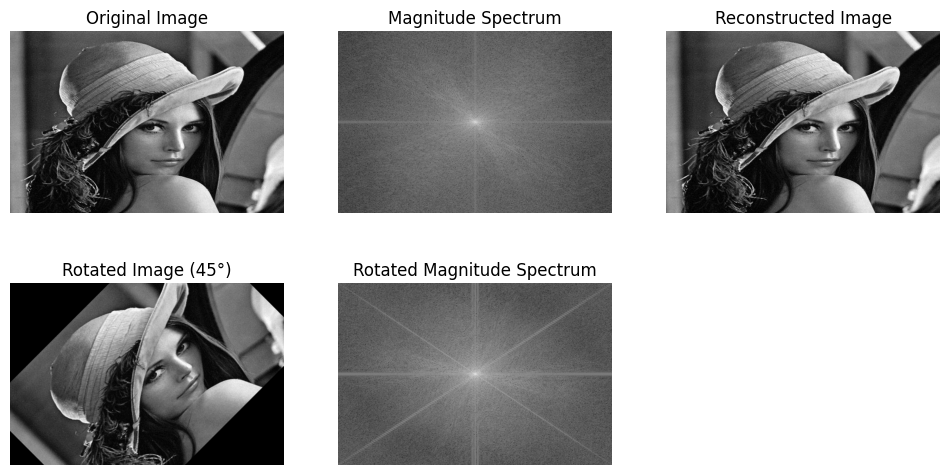

In [ ]:
#Anshika Gupta: E22CSEU0921: Batch-31
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_dft(image):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)  # Centering the spectrum
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
    return dft_shift, magnitude_spectrum

def inverse_dft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = cv2.idft(dft_ishift)
    img_reconstructed = cv2.magnitude(img_reconstructed[:, :, 0], img_reconstructed[:, :, 1])
    return img_reconstructed

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def main():
    image = cv2.imread('grayscale_image.png', cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not found!")
        return

    # Step 1: Compute DFT and Magnitude Spectrum
    dft_shift, magnitude_spectrum = compute_dft(image)

    # Step 2: Apply Inverse DFT
    reconstructed_image = inverse_dft(dft_shift)

    # Step 3: Verify Rotation Property
    rotated_image = rotate_image(image, 45)
    rotated_dft_shift, rotated_magnitude_spectrum = compute_dft(rotated_image)

    # Displaying results
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
    plt.title("Original Image"), plt.axis('off')

    plt.subplot(2, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum"), plt.axis('off')

    plt.subplot(2, 3, 3), plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Reconstructed Image"), plt.axis('off')

    plt.subplot(2, 3, 4), plt.imshow(rotated_image, cmap='gray')
    plt.title("Rotated Image (45°)"), plt.axis('off')

    plt.subplot(2, 3, 5), plt.imshow(rotated_magnitude_spectrum, cmap='gray')
    plt.title("Rotated Magnitude Spectrum"), plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()
